## ARMA models

ARMA (Auto-regressive moving-average) model accounts for autocorrelation and moving average in time series. ARMA model of order (p,q), contains the AR(p) and MA(q) models. A process $\{X_t\}$ is an ARMA(p,q) if it is stationary and if it satisfies the following:

$$X_t = c+ \sum_{i=1}^p \varphi_i X_{t-i} + \epsilon_t + \sum_{i=1}^q \theta_i \epsilon_{t-i}$$

Typically, it is assumed that the error terms process $\epsilon_t$ is a white noise ($WN(0, \sigma^2)$). Note, that  generate_sample function, implemented by the statsmodels library and used by us to sample arma processes, it is assumed that $\epsilon_t$ are i.i.d following standard normal distribution. 

What we will do below is that we will analyze the behaviour of typical "arma"-type time series.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_process import ArmaProcess

In [2]:
import warnings
warnings.filterwarnings("ignore")

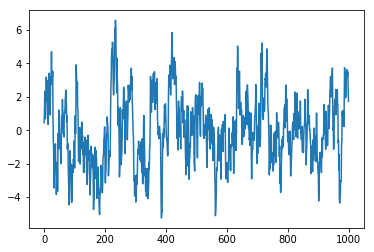

In [3]:
#simulating arma process with autocorrelation coefficient at lag 1 = 0.9 (it goes with "-" sign in arma setting)
ar = np.array([1,-0.9])
ma = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data1 = AR_object.generate_sample(nsample = 1000)
plt.plot(simulated_data1)

One observes that the time series follow momentum tendency (positive previous value leads to even higher next value and vice-versa). 

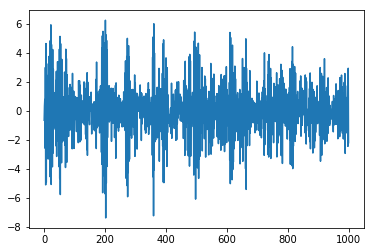

In [4]:
#simulating arma process with autocorrelation coefficient at lag 1 = -0.9
ar = np.array([1,0.9])
ma = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data2 = AR_object.generate_sample(nsample = 1000)
plt.plot(simulated_data2)

One observes strong mean-reversion in the process above.

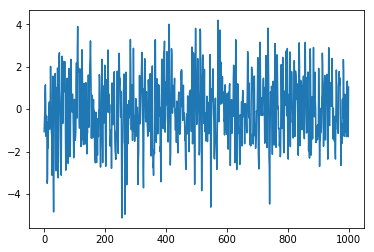

In [6]:
#simulating arma process with autocorrelation coefficient at lag 1 = 0.9
ar = np.array([1,-0.9, 0.5])
ma = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data3 = AR_object.generate_sample(nsample = 1000)
plt.plot(simulated_data3)

This time series should ehixibit both, momentum and mean-reversion behaviour, with respect to lag 1 and 2 respectively.

### ACF and PACF:

ACF and PACF plots can help to recognize the level of autocorrelation. ACF (autocorrelation function) of lag-k quantifies the correlation between $X_t$ and $X_{t-k}$. PACF estimates the autocorrelation between $X_t$ and $X_{t-k}$ with the linear dependence of $X_t$ on $X_{t-1}$ through $X_{t-k+1}$ removed; that is, it is the autocorrelation only with respect to $X_{t-k}$. 

In plot_acf function, alpha determines the width of the confidence interval. I.e. when alpha = 0.05, it means that with probability 0.05 if the true correlation is non-zero it will fall out of the blue band. 

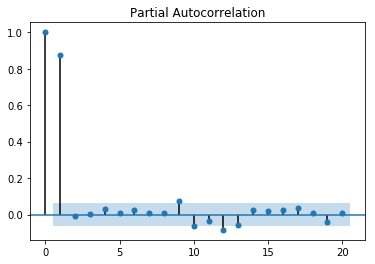

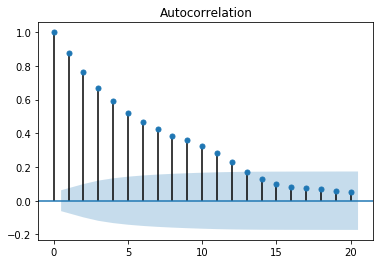

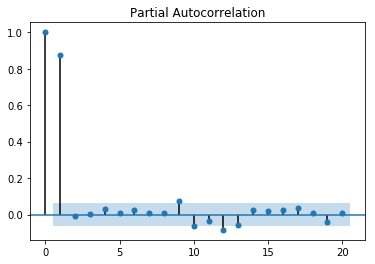

In [7]:
#plot acf plot, with lags = 20 and confidence 5%
plot_acf(simulated_data1, lags = 20, alpha = 0.05)
plot_pacf(simulated_data1, lags = 20, alpha = 0.05)

ACF plot tails off, indicating the strong autocorrelation between $x_t$ and $x_{t-1}$. PACF plot indicates that only the autocorrelation with lag-1 is significant.

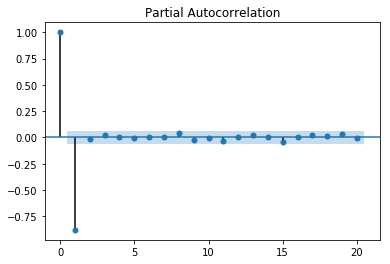

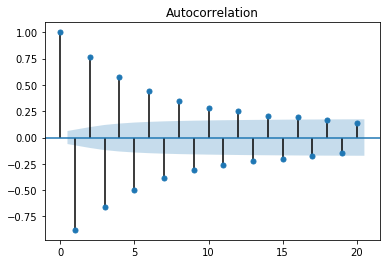

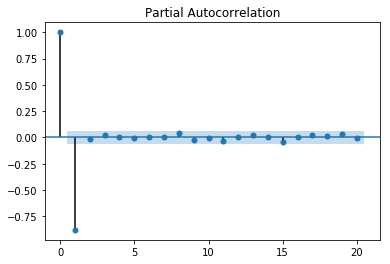

In [8]:
plot_acf(simulated_data2, lags = 20, alpha = 0.05)
plot_pacf(simulated_data2, lags = 20, alpha = 0.05)

Simulated_data2 should exhibit mean reversion. The ACF plot indicates mean-reversion by switching the sign of the autocorrelation, while PACF plot indicates that only the 1-lag autocorrelation coefficient is significant. 

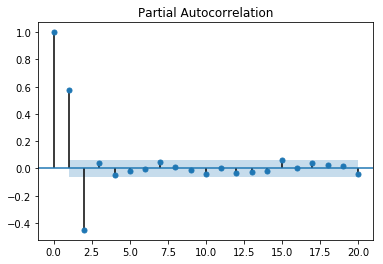

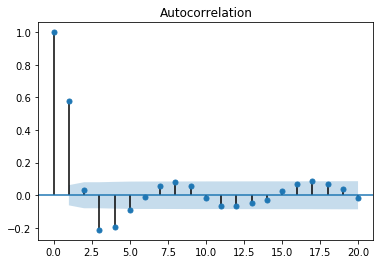

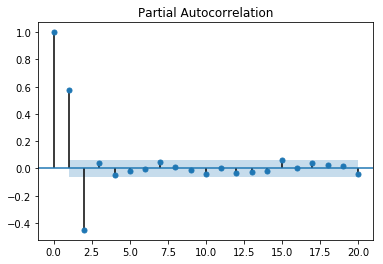

In [24]:
plot_acf(simulated_data3, lags = 20, alpha = 0.05)
plot_pacf(simulated_data3, lags = 20, alpha = 0.05)

PACF identifies that the first lag autocorrelation is positive and second lag autocorrelation is negative. 

### Fitting the model based on Akaike information criterion. 

In [11]:
#set the list of (p,q)'s we consider
set_ind = [(i,j) for i in range(0,3) for j in range(0,2)]

#dictionary with (p,q) as keys and AIC as values
dict_aic = {}

for (i,j) in set_ind:
    mod = ARMA(simulated_data3, order = (i,j))
    result = mod.fit()
    dict_aic[(i,j)] = result.aic

print(dict_aic)

{(0, 0): 3652.0015392892374, (0, 1): 3108.7993162775065, (1, 0): 3205.6813833188107, (1, 1): 3025.539876035186, (2, 0): 2945.283395617078, (2, 1): 2947.20907418143}


The model fit identifies that ar = 2 and ma = 0 is the best fit for our simulated data. The best fit is based on AIC. 

Below, the summary of the fit is desplayed. The fit identifies the coefficients quite accurately. 

In [10]:
model = ARMA(simulated_data3, order = (2,0))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(2, 0)   Log Likelihood               -1468.642
Method:                       css-mle   S.D. of innovations              1.050
Date:                Thu, 10 Oct 2019   AIC                           2945.283
Time:                        16:40:05   BIC                           2964.914
Sample:                             0   HQIC                          2952.745
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0289      0.056     -0.513      0.608      -0.139       0.081
ar.L1.y        0.8907      0.028     32.102      0.000       0.836       0.945
ar.L2.y       -0.4807      0.028    -17.335      0.000      -0.535      -0.426
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9264           -1.1054j            1.4423           -0.1390
AR.2            0.9264           +1.1054j            1.4423            0.1390
-----------------------------------------------------------------------------
"""